In [1]:
# Common imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings("ignore")



boston_dataset = load_boston() #load data
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names) #create pandas dataframe
boston['MEDV'] = boston_dataset.target #set MEDV as target
boston.isnull().sum() #check if there is missing data

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<AxesSubplot:>

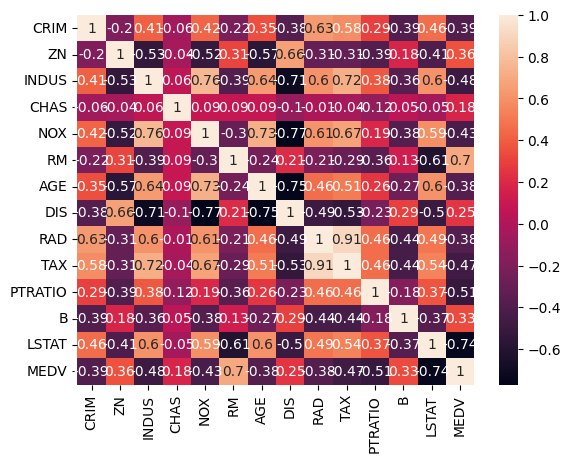

In [2]:
#Plot correlation matrix
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [3]:
# Common imports
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split

#Set dataframe with choosed parameters picked from initial data
X = pd.DataFrame(np.c_[boston['NOX'], boston['RM'], boston['INDUS'], boston['TAX'], boston['LSTAT'], boston['PTRATIO']], columns = ['NOX','RM','INDUS','TAX','LSTAT','PRATIO'])
#True value of the target
z = boston['MEDV']

# Scaling data
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

#Creating list to store the results
Z_test_predict = []
Z_train_predict = []
mean_bias = []
mean_variance = []
bias_variance = []
testing_error=[]
training_error =[]
testing_r2=[]
training_r2 =[]

#Polynomial order
poly = 3

#creating a list of value for lambda
LAMBDA = [100000,10000,1000, 100,10, 1, 0.1, 0.01, 0.001, 0.0001]

#Total number of lambda
nlambdas = len(LAMBDA)

for j in range (nlambdas): #loop for lambda
    
    #creating list to retrieve results for each lambda value
    mse_test=[]
    r2_test=[]
    mse_train=[]
    r2_train=[]
    bias = []
    variance = []
    
    #Getting lambda value
    lmb = LAMBDA[j]
    
    #Make folds using SKlearn
    kf = KFold(n_splits=10, random_state=42, shuffle=True)
    kf.get_n_splits(X_scaled)
    
    i = 0
    for train_index, test_index in kf.split(X_scaled):
        # #Make train and test data using the folds made by SKlearn
        X_train_scaled, X_test_scaled = X_scaled[train_index], X_scaled[test_index]
        z_train, z_test = z.ravel()[train_index], z.ravel()[test_index]
        
        # Fit training data usink SKlearn
        polyreg=make_pipeline(PolynomialFeatures(poly),Ridge(lmb))
        polyreg.fit(X_train_scaled,z_train)

        # model evaluation for training set
        z_train_predict=polyreg.predict(X_train_scaled)
        Z_train_predict.append(z_train_predict)
        mse_train = (np.sqrt(mean_squared_error(z_train, z_train_predict)))
        r2_train = r2_score(z_train, z_train_predict)
        
        # model evaluation for testing set
        z_test_predict=polyreg.predict(X_test_scaled)
        Z_train_predict.append(z_test_predict)
        mse_test = (np.sqrt(mean_squared_error(z_test, z_test_predict)))
        r2_test = r2_score(z_test, z_test_predict)
        
        
        variance.append(np.var(z_test_predict , axis=0, keepdims=True))
        b= np.mean((z_test - np.mean(z_test_predict, axis=0, keepdims=True))**2)
        bias.append(b)  
        
        # Increment counter i
        i = i + 1
        
    # Print MSE and R2
    print('Lamdda:', lmb)
    print("\n")
    print("The model performance for training set")
    print("--------------------------------------")
    training_error.append(np.mean(mse_train))
    print('RMSE is {}'.format(np.mean(mse_train)))
    training_r2.append(np.mean(r2_train))
    print('R2 score is {}'.format(np.mean(r2_train)))
    print("\n")

    print("The model performance for testing set")
    print("--------------------------------------")
    testing_error.append(np.mean(mse_test))
    print('RMSE is {}'.format(np.mean(mse_test)))
    testing_r2.append(np.mean(r2_test))
    print('R2 score is {}'.format(np.mean(r2_test)))
    print("\n")
    
    #Prediction of the z value using Ridge model
    zpred = polyreg.predict(X) #dim = 1
    
    #filling lists with the result for each lambda
    mean_bias.append(np.mean(bias))
    mean_variance.append(np.mean (variance))
    bias_variance.append(mean_variance[j-1]+mean_bias[j-1])

Lamdda: 100000


The model performance for training set
--------------------------------------
RMSE is 7.858816587004916
R2 score is 0.28516391607004


The model performance for testing set
--------------------------------------
RMSE is 6.894468670651356
R2 score is 0.2837851963545608


Lamdda: 10000


The model performance for training set
--------------------------------------
RMSE is 5.801989386712028
R2 score is 0.6103757127521992


The model performance for testing set
--------------------------------------
RMSE is 5.430330335362728
R2 score is 0.5556817142669515


Lamdda: 1000


The model performance for training set
--------------------------------------
RMSE is 4.094568143643375
R2 score is 0.80595235911513


The model performance for testing set
--------------------------------------
RMSE is 4.965416252766891
R2 score is 0.6285049671690619


Lamdda: 100


The model performance for training set
--------------------------------------
RMSE is 3.0929095349602798
R2 score is 0.8892

[7.858816587004916, 5.801989386712028, 4.094568143643375, 3.0929095349602798, 2.780936515624805, 2.653782920570016, 2.6176237256517423, 2.6155791192417115, 2.6155490979794167, 2.615548783789447]
[6.894468670651356, 5.430330335362728, 4.965416252766891, 4.358405525293304, 4.020537319173841, 3.9780071490770377, 4.138781571163118, 4.224767251197956, 4.23665585110719, 4.237890151084741]


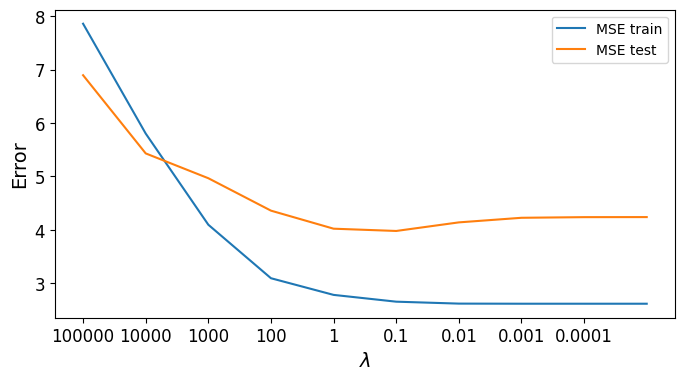

In [4]:
plt.figure(figsize=(8,4))
plt.plot(training_error, label="MSE train")
print(training_error)
plt.plot(testing_error, label="MSE test")
print(testing_error)
plt.legend(fontsize = 10)
plt.xticks([0,1,2,3,4,5,6,7,8],["100000","10000","1000","100","1","0.1","0.01","0.001","0.0001"], fontsize=12)
plt.xlabel('$\lambda$', fontsize=14)
plt.ylabel("Error", fontsize = 14)
plt.yticks(fontsize=12)
plt.show()

[0.28516391607004, 0.6103757127521992, 0.80595235911513, 0.8892798678107522, 0.9104894325795222, 0.9184877370660225, 0.9206938992342014, 0.9208177416592266, 0.9208195593352334, 0.9208195783581596]
[0.2837851963545608, 0.5556817142669515, 0.6285049671690619, 0.71378198769196, 0.7564378025125028, 0.7615634622401393, 0.7419007742865553, 0.7310650382920643, 0.7295493293520414, 0.7293917211368295]


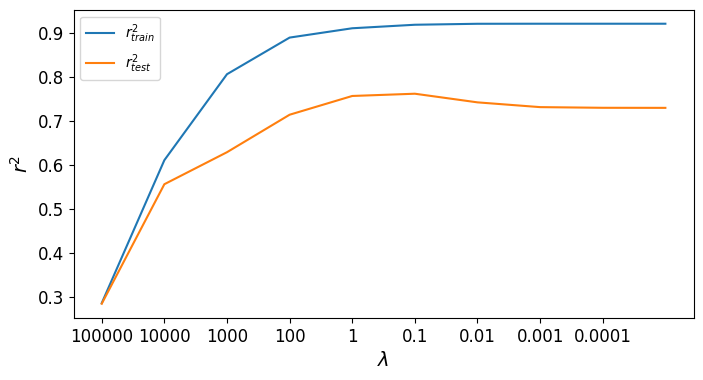

In [5]:
plt.figure(figsize=(8,4))
plt.plot(training_r2, label=r'$r^2_{train}$')
print(training_r2)
plt.plot(testing_r2, label=r'$r^2_{test}$')
print(testing_r2)
plt.legend(fontsize = 10)
plt.xticks([0,1,2,3,4,5,6,7,8],["100000","10000","1000","100","1","0.1","0.01","0.001","0.0001"], fontsize=12)
plt.xlabel('$\lambda$', fontsize=14)
plt.ylabel(r'$r^2$', fontsize = 14)
plt.yticks(fontsize=12)
plt.show()

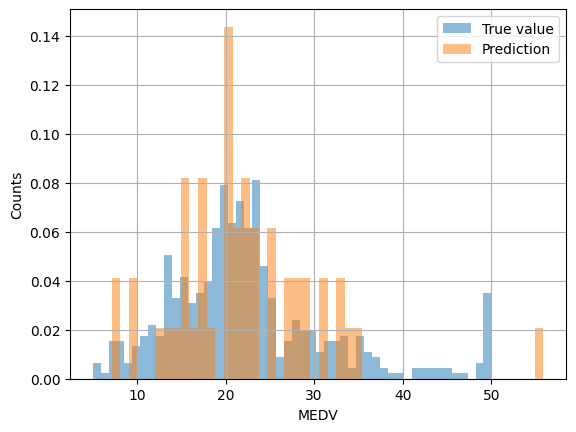

In [6]:
from matplotlib import pyplot
pyplot.hist(boston['MEDV'], 50, density=True, alpha=0.5, label='True value')
pyplot.hist(z_test_predict, 50, density=True, alpha=0.5, label='Prediction')
plt.xlabel('MEDV')
plt.ylabel('Counts')
plt.grid(True)
pyplot.legend(loc='upper right')
plt.show()